# Explore here

Standard Linear Regression with multiple variables follows a linear equation:

#### $y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + b_{3}x_{3} + ... + b_{n}x_{n} + \epsilon$

The $b_{i}$ coefficients are estimated to minimize the Sum of Squared Errors (SSE), subtracting each predicted value $\hat{y_{i}}$ from the actual values $y_{i}$ and squaring the terms (to ensure they are all positive):

#### $SSE = \sum{(y_{i} - \widehat{y_{i}})^{2}}$

Normally, the `LinearRegression()` function inside the `sklearn` library takes care of these estimates for us. But sometimes, this function will *overfit* the data and we must introduce some penalty.

### Ridge Regression

Ridge Regression introduces the $L_2$ penalty (second-order, i.e. squared), which shrinks the estimates towards 0 as the $\lambda$ penalty becomes large. This does NOT perform feature selection even though some parameters may become negligibly small.

#### $SSE_{L_2} = \sum{(y_{i} - \widehat{y_{i}})^{2}} + \lambda \sum{b_{j}^2}$

### Lasso Regression

Lasso Regression introduces the $L_1$ penalty (first-order, i.e. not squared)), which shrinks the estimates towards 0 as the $\lambda$ penalty becomes large.  Sometimes feature weights will shrink all the way to 0, and this creates a version of feature selection to remove features:

#### $SSE_{L_1} = \sum{(y_{i} - \widehat{y_{i}})^{2}} + \lambda \sum{|b_{j}|}$

Let's code some example below.


In [1]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

main_df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [28]:
main_df.iloc[: , -20:]

,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,39.5,41.9,8013,11.0,10.1,11.8,2159,12.1,10.7,13.3,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,37.4,40.2,6894,8.6,7.9,9.3,1533,10.0,8.8,11.3,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,32.4,35.5,15112,9.2,8.4,10.1,4101,10.5,9.1,12.0,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,32.1,35.1,10672,5.9,5.4,6.4,1862,6.6,5.7,7.7,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,18.1,20.8,3655,5.2,4.6,5.8,981,4.9,4.0,6.0,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,32.5,35.7,4944,7.2,6.5,7.9,1034,8.0,7.0,9.2,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,27.0,29.8,1730,8.2,7.4,9.0,500,8.3,7.1,9.6,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [26]:
main_df.drop(columns=['COUNTY_NAME', 'STATE_NAME'], inplace=True)

In [29]:
y = main_df['Heart disease_prevalence']

X = main_df.drop(columns = ['Heart disease_prevalence'])

In [30]:
from sklearn.linear_model import Lasso

In [31]:
lasso_model = Lasso()

lasso_model.fit(X, y)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+03, tolerance: 9.708e-01
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [32]:
predictions = lasso_model.predict(X)

<Axes: xlabel='Heart disease_prevalence'>

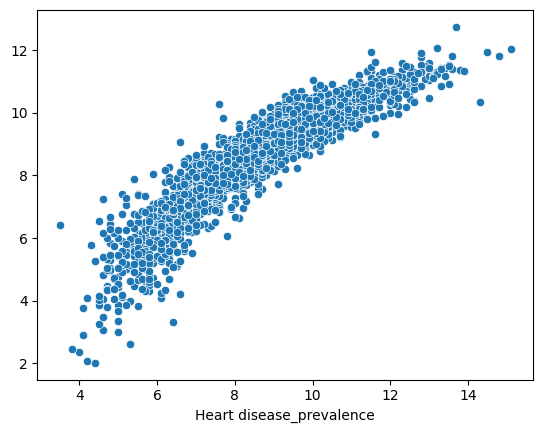

In [33]:
sns.scatterplot(x=y, y = predictions)

In [43]:
first_model_coef = pd.DataFrame([lasso_model.feature_names_in_, lasso_model.coef_]).T

first_model_coef.columns = ["Feature", "Weight"]

first_model_coef

,Feature,Weight
0,fips,0.000002
1,TOT_POP,-0.000004
2,0-9,-0.000005
3,0-9 y/o % of total pop,-0.0
4,19-Oct,0.000011
...,...,...
100,CKD_prevalence,0.0
101,CKD_Lower 95% CI,0.0
102,CKD_Upper 95% CI,0.0
103,CKD_number,-0.00011


(-0.001, 0.001)

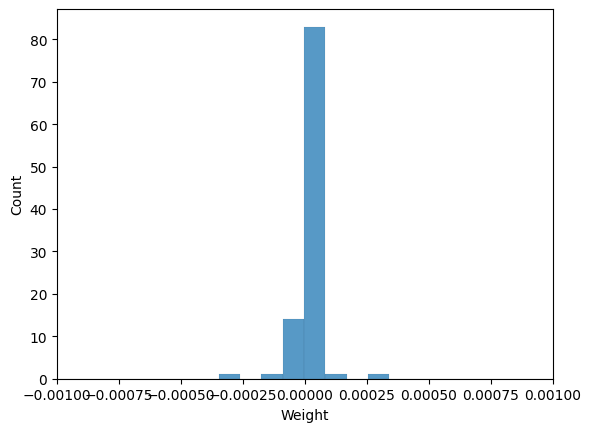

In [48]:
sns.histplot(first_model_coef['Weight'], bins=1000)
plt.xlim(-0.001, 0.001)

### The Need for Scaling Your Dataset

In [49]:
main_df.iloc[:, 57:63]

,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC)
0,25015,942,3.6,59338,119.0,217.1
1,90456,3393,3.6,57588,115.5,217.1
2,7940,433,5.2,34382,68.9,217.1
3,8317,344,4.0,46064,92.3,217.1
4,24128,878,3.5,50412,101.1,217.1
...,...,...,...,...,...,...
3135,20254,896,4.2,73315,117.8,207.9
3136,14876,464,3.0,99087,159.2,207.9
3137,8541,390,4.4,63401,101.8,207.9
3138,3886,172,4.2,55190,88.6,207.9


In [64]:
90456 / X['Employed_2018'].max()

0.01847355832069849

### Let's run the LASSO algorithm again, but this time using re-scaled data

In [78]:
y = main_df['Heart disease_prevalence']

X = main_df.drop(columns = ['Heart disease_prevalence'])

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
mms = MinMaxScaler()

X_scaled = mms.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled)
scaled_df.columns = X.columns

In [81]:
scaled_df.iloc[:, 57:63]

,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC)
0,0.005109,0.003928,0.180905,0.422690,0.451442,0.039347
1,0.018474,0.014148,0.180905,0.410224,0.438164,0.039347
2,0.001622,0.001805,0.261307,0.244917,0.261381,0.039347
3,0.001699,0.001434,0.201005,0.328133,0.350152,0.039347
4,0.004928,0.003661,0.175879,0.359106,0.383536,0.039347
...,...,...,...,...,...,...
3135,0.004136,0.003736,0.211055,0.522254,0.446889,0.025316
3136,0.003038,0.001935,0.150754,0.705838,0.603945,0.025316
3137,0.001744,0.001626,0.221106,0.451632,0.386191,0.025316
3138,0.000794,0.000717,0.211055,0.393142,0.336115,0.025316


In [82]:
scaled_lasso = Lasso()

scaled_lasso.fit(X,y)

scaled_predictions = scaled_lasso.predict(X)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+03, tolerance: 9.708e-01
  model = cd_fast.enet_coordinate_descent(


<Axes: xlabel='Heart disease_prevalence'>

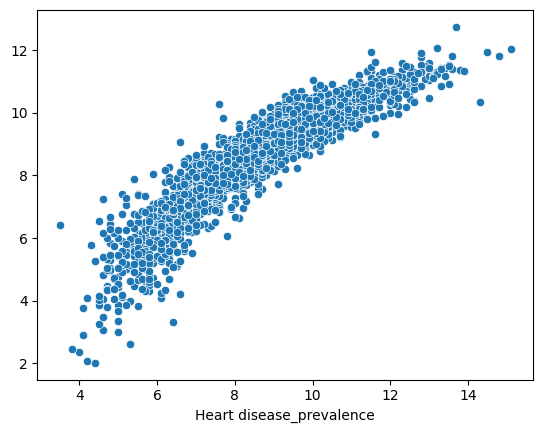

In [83]:
sns.scatterplot(x=y, y=scaled_predictions)

In [86]:
second_model_coef = pd.DataFrame([scaled_lasso.feature_names_in_, scaled_lasso.coef_]).T

second_model_coef.columns = ['Feature', 'Weight']

second_model_coef

,Feature,Weight
0,fips,0.000002
1,TOT_POP,-0.000004
2,0-9,-0.000005
3,0-9 y/o % of total pop,-0.0
4,19-Oct,0.000011
...,...,...
100,CKD_prevalence,0.0
101,CKD_Lower 95% CI,0.0
102,CKD_Upper 95% CI,0.0
103,CKD_number,-0.00011


In [93]:
temp_df = second_model_coef[second_model_coef['Weight'] != 0]

temp_df

,Feature,Weight
0,fips,0.000002
1,TOT_POP,-0.000004
2,0-9,-0.000005
4,19-Oct,0.000011
6,20-29,-0.000016
8,30-39,0.00001
10,40-49,-0.000008
12,50-59,0.000021
14,60-69,-0.000007
16,70-79,0.000017


In [94]:
reduced_features = temp_df['Feature']

reduced_features

0                                            fips
1                                         TOT_POP
2                                             0-9
4                                          19-Oct
6                                           20-29
8                                           30-39
10                                          40-49
12                                          50-59
14                                          60-69
16                                          70-79
18                                            80+
20                                White-alone pop
22                                Black-alone pop
23                                  % Black-alone
24      Native American/American Indian-alone pop
26                                Asian-alone pop
28            Hawaiian/Pacific Islander-alone pop
30                          Two or more races pop
32                              POP_ESTIMATE_2018
33                                 N_POP_CHG_2018


### One more model using the rescaled and reduced number of features

In [110]:
reduced_X = X[reduced_features]

reduced_X

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Percent of Population Aged 60+,CNTY_FIPS,county_pop2018_18 and older,anycondition_Upper 95% CI,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,19.1,1,42438,49.4,20181,15193,3345,3644,5462,1326
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,26.3,3,170912,42.3,68790,50761,13414,14692,20520,5479
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,23.5,5,19689,59.1,11325,8013,2159,2373,3870,887
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,21.1,7,17813,53.4,9190,6894,1533,1789,2511,595
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,23.6,9,44448,48.4,20584,15112,4101,4661,6017,1507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,6326,5359,6577,5334,5261,4943,2198,...,15.8,37,31761,42.2,12796,10672,1862,2098,2834,821
3136,56039,23081,2384,2185,2967,4093,3423,2928,2875,1569,...,18.7,39,18842,26.1,4576,3655,981,928,1360,447
3137,56041,20299,3121,3205,2153,2702,2390,2434,2554,1233,...,17.1,41,14455,44.2,6101,4944,1034,1163,1500,430
3138,56043,7885,858,1113,715,903,900,1085,1118,741,...,26.7,43,6092,39.5,2285,1730,500,506,686,207


In [112]:
mms = MinMaxScaler()
reduced_X = mms.fit_transform(reduced_X)

reduced_lasso = Lasso()
reduced_lasso.fit(reduced_X,y)

reduced_predictions = reduced_lasso.predict(reduced_X)

Text(0, 0.5, 'Predicted values')

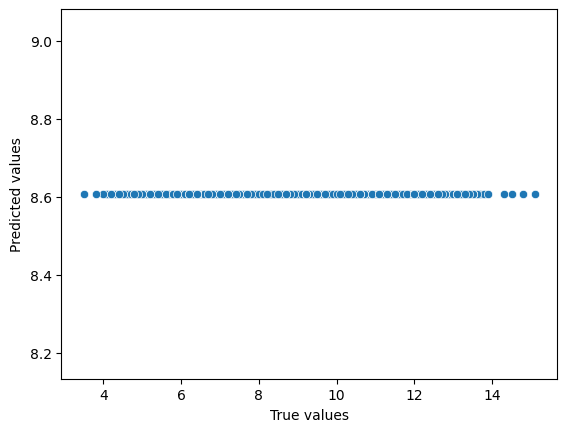

In [113]:
sns.scatterplot(x=y, y=reduced_predictions)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [114]:
pd.DataFrame([reduced_lasso.feature_names_in_,reduced_lasso.coef_]).T

AttributeError: 'Lasso' object has no attribute 'feature_names_in_'

### Let's evaluate the model using standard metrics

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [104]:
def model_evaluation(y_true, y_prediction):
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_prediction))}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_prediction)}")
    print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_true, y_prediction)}")
    print(f"R2 Score: {r2_score(y_true, y_prediction)}")

In [105]:
model_evaluation(y, reduced_predictions)

RMSE: 0.6882780197665991
Mean Absolute Error: 0.522752052295266
Mean Absolute Percentage Error: 0.06327323549060804
R2 Score: 0.8467718810368079


<Axes: xlabel='Heart disease_prevalence', ylabel='Count'>

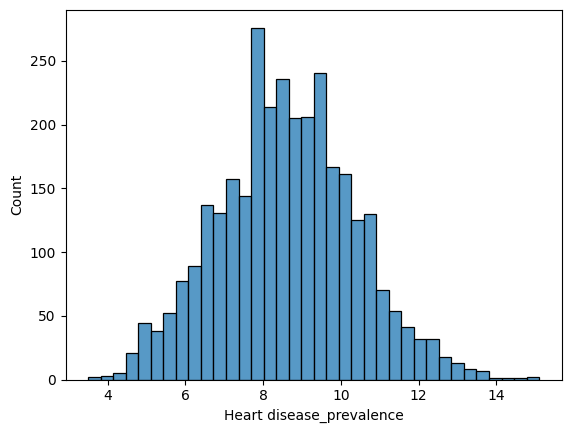

In [106]:
sns.histplot(y)

### Example for the need to scale

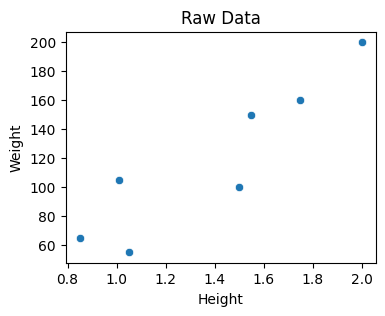

In [77]:
height = np.array([1.50, 2.00, 1.01, 1.05, 0.85, 1.75, 1.55])
weight = np.array([100, 200, 105, 55, 65, 160, 150])

plt.figure(figsize=(4,3))
sns.scatterplot(x=height, y = weight)
plt.title("Raw Data")
plt.xlabel("Height")
plt.ylabel("Weight");

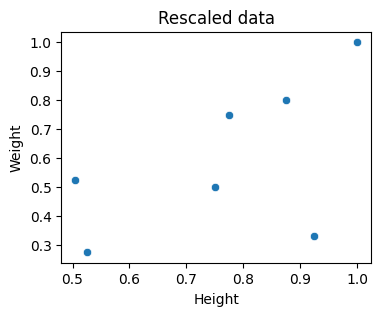

In [76]:
height = np.array([1.50, 2.00, 1.01, 1.05, 0.85 + 1, 1.75, 1.55])
weight = np.array([100, 200, 105, 55, 65 + 1, 160, 150])

plt.figure(figsize=(4,3))
sns.scatterplot(x=height / height.max(), y = weight / weight.max())

plt.title("Rescaled data")
plt.xlabel("Height")
plt.ylabel("Weight");